In [1]:
# DATA EXTRACTION - Population

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing the table
url = 'https://cuentame.inegi.org.mx/monografias/informacion/mex/poblacion/default.aspx?tema=me&e=15'

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.text, 'html.parser')

# Find the nested table within the outer table by its id
inner_table = soup.find('table', id='keywords2')  # Adjust id name as needed

# Check if inner table is found
if inner_table:
    # Initialize lists to store the data
    data = []

    # Loop through each row in the inner table
    for row in inner_table.find_all('tr'):
        # Initialize list to store data for each row
        row_data = []
        # Loop through each cell in the row
        for cell in row.find_all('td'):
            # Append the cell content to the row_data list
            row_data.append(cell.text.strip())
        # Append the row_data list to the data list
        data.append(row_data)

    # Convert the data list to a DataFrame
    df = pd.DataFrame(data)

In [2]:
# DATA WRANGLER - Population

# Drop the top an bottom rows
df = df.drop(df.index[0], axis=0)
df = df.drop(df.columns[0], axis=1)

# Remove commas and convert to float
df.iloc[:, 1] = df.iloc[:, 1].str.replace(',', '').astype(int)

# Rename the columns
new_column_names = ['Municipality', 'Population']
df.columns = new_column_names

# Delete extra spaces
df = df.replace(r'\s+', ' ', regex=True)

# Delete "San Simón de Guerrero" because of missing data in the cases table
df = df[df['Municipality'] != 'San Simón de Guerrero']

populationByMunicipality = df

In [27]:
# populationByMunicipality

In [4]:
# DATA EXTRACTION - COVID Cases

# URL of the webpage containing the table
url = 'https://salud.edomex.gob.mx/salud/covid19_municipio'

# Send a GET request to the webpage
response = requests.get(url)

# Parse the HTML content of the webpage
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table by its class
table = soup.find('table', class_='table table-striped tablaestadistica')  # Replace 'your-table-class' with the actual class name

# Initialize lists to store the data
data = []

# Loop through each row in the table
for row in table.find_all('tr'):
    # Initialize list to store data for each row
    row_data = []
    # Loop through each cell in the row
    for cell in row.find_all(['th', 'td']):  # Include both th and td elements
        # Append the cell content to the row_data list
        row_data.append(cell.text.strip())
    # Append the row_data list to the data list
    data.append(row_data)

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

In [5]:
# DATA WRANGLING - COVID Cases

df = df.iloc[1:-1]

# Rename columns
new_column_names = ['Municipality', 'Cases', 'Deaths']
df.columns = new_column_names

# Delete "San Simón de Guerrero" because of missing data in the cases table
df = df[df['Municipality'] != 'San Simón de Guerrero']

import numpy as np

# Remove commas and convert to integer for the second and third columns
df.iloc[:, 1:3] = df.iloc[:, 1:3].replace(',', '', regex=True).astype(int)

covidCasesByMunicipality = df

In [28]:
# covidCasesByMunicipality

In [7]:
# DATA NORMALIZATION

# Dictionary mapping old names to new names
old_names_to_new_names = {
    'Teoloyucan': 'Teoloyucán',
}

# Replace the old names with the new names
populationByMunicipality['Municipality'] = populationByMunicipality['Municipality'].replace(old_names_to_new_names)

old_names_to_new_names = {
    'Acambay': 'Acambay de Ruíz Castañeda',
    'Valle de Chalco': 'Valle de Chalco Solidaridad',
    'Naucalpan': 'Naucalpan de Juárez',
    'Tlalnepantla': 'Tlalnepantla de Baz',
}

# Replace the old names with the new names
covidCasesByMunicipality['Municipality'] = covidCasesByMunicipality['Municipality'].replace(old_names_to_new_names)


# Get the set of unique municipalities in each DataFrame
municipalities_df1 = set(populationByMunicipality['Municipality'])
municipalities_df2 = set(covidCasesByMunicipality['Municipality'])

# Find the municipalities that exist in both DataFrames
common_municipalities = municipalities_df1.intersection(municipalities_df2)

# Print the municipalities that exist in both DataFrames
print("Municipalities that exist in both DataFrames:")
print(common_municipalities)

# Find the municipalities that exist in one DataFrame but not in the other
unique_to_df1 = municipalities_df1 - municipalities_df2
unique_to_df2 = municipalities_df2 - municipalities_df1

# Print the municipalities that exist in one DataFrame but not in the other
print("Municipalities unique to DataFrame 1:")
print(unique_to_df1)
print("Municipalities unique to DataFrame 2:")
print(unique_to_df2)


Municipalities that exist in both DataFrames:
{'Ixtlahuaca', 'Jocotitlán', 'San Felipe del Progreso', 'Almoloya del Río', 'Atizapán de Zaragoza', 'Calimaya', 'Jilotzingo', 'Polotitlán', 'Lerma', 'Chiconcuac', 'Temascalapa', 'Zumpahuacán', 'Ixtapaluca', 'Zacazonapan', 'Donato Guerra', 'Axapusco', 'Ecatzingo', 'Tecámac', 'Aculco', 'Coacalco de Berriozábal', 'Mexicaltzingo', 'Morelos', 'San Antonio la Isla', 'Tepetlixpa', 'Villa Victoria', 'Tonatico', 'Zacualpan', 'Sultepec', 'Metepec', 'Otzolotepec', 'Acolman', 'Ozumba', 'Teoloyucán', 'Villa de Allende', 'San Martín de las Pirámides', 'Zumpango', 'Ixtapan de la Sal', 'Tultepec', 'Hueypoxtla', 'Tianguistenco', 'Huixquilucan', 'Teotihuacán', 'Valle de Chalco Solidaridad', 'Jilotepec', 'Isidro Fabela', 'Tepotzotlán', 'Villa del Carbón', 'Texcaltitlán', 'Atlautla', 'Atizapán', 'Otzoloapan', 'Coatepec Harinas', 'Cuautitlán Izcalli', 'Chapultepec', 'Toluca', 'El Oro', 'Amanalco', 'Cocotitlán', 'Xonacatlán', 'Luvianos', 'Rayón', 'Tenango del Ai

In [8]:
# DATA INTEGRATION

# Merge both DF based on the column Municipality
merged_df = populationByMunicipality.merge(covidCasesByMunicipality, on='Municipality')

In [29]:
# merged_df

In [30]:
# Calculate the rate of mortality and round it to two decimal places
merged_df['Rate of Mortality'] = ((merged_df['Deaths'] / merged_df['Cases']) * 100).astype(float).round(2)

# print(merged_df)

D:\Programs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


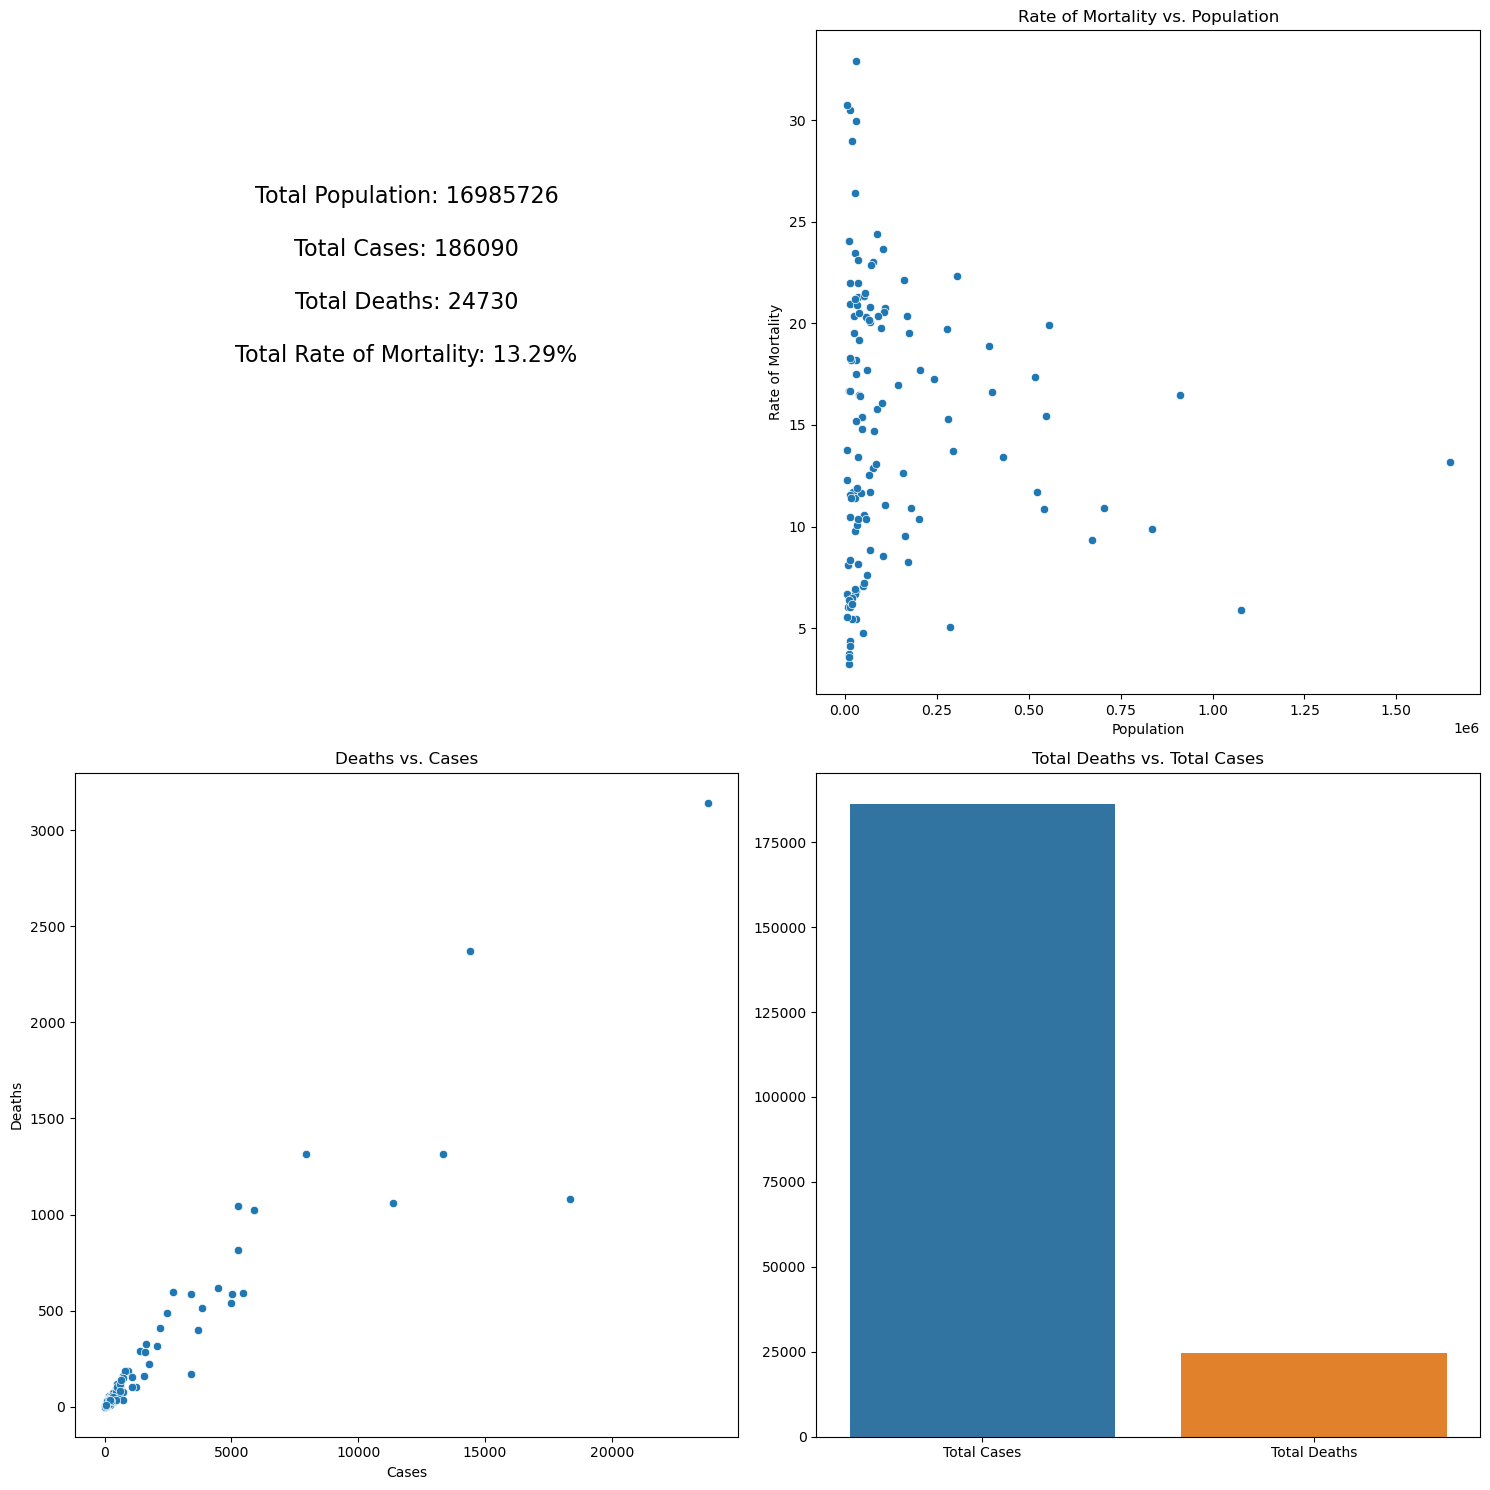

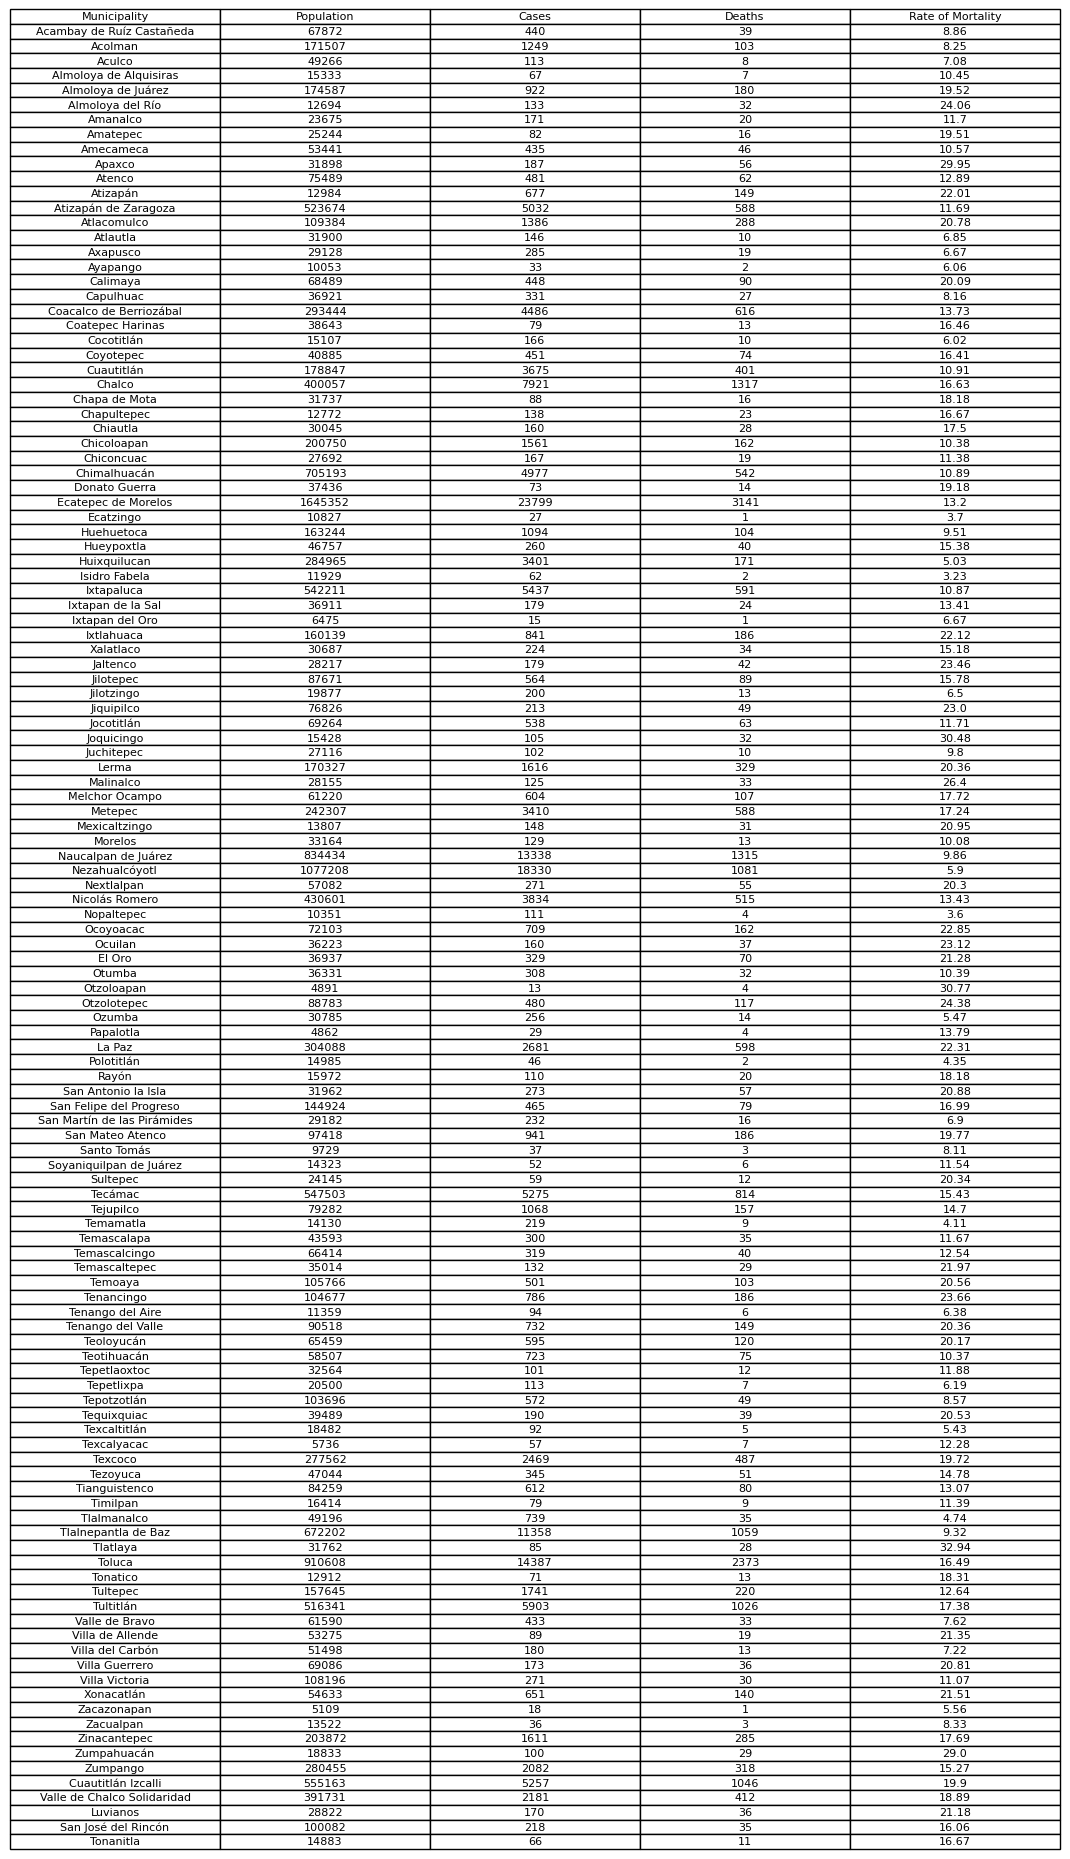

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total cases and deaths
total_cases = merged_df['Cases'].sum()
total_deaths = merged_df['Deaths'].sum()

# Create a figure and axis for the visualization board
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Total Indicators
total_population = merged_df['Population'].sum()
total_rate_of_mortality = total_deaths / total_cases * 100

axs[0, 0].text(0.5, 0.5, f'Total Population: {total_population}\n\n'
                           f'Total Cases: {total_cases}\n\n'
                           f'Total Deaths: {total_deaths}\n\n'
                           f'Total Rate of Mortality: {total_rate_of_mortality:.2f}%', ha='center', fontsize=16)
axs[0, 0].axis('off')

# Plot 1: Comparison between rate of mortality and population
sns.scatterplot(x='Population', y='Rate of Mortality', data=merged_df, ax=axs[0, 1])
axs[0, 1].set_title('Rate of Mortality vs. Population')

# Plot 2: Comparison between deaths and cases
# Calculate the percentage of deaths relative to cases
sns.scatterplot(x='Cases', y='Deaths', data=merged_df, ax=axs[1, 0])
axs[1, 0].set_title('Deaths vs. Cases')

# Plot 3: Comparison between total deaths and total cases
sns.barplot(x=['Population', 'Total Deaths'], y=[total_cases, total_deaths], ax=axs[1, 1])
axs[1, 1].set_title('Total Deaths vs. Total Cases')

# Adjust layout
plt.tight_layout()

# Create a new figure for the table
fig_table, ax_table = plt.subplots(figsize=(15, 2))

# Hide the axis
ax_table.axis('off')

# Customize the style of the table
merged_df_style = merged_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey'), ('color', 'black'),
                                  ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'whitesmoke')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
    {'selector': 'caption', 'props': [('caption-side', 'bottom')]}
])

# Plot the styled table
tab = ax_table.table(cellText=merged_df_style.data.values, colLabels=merged_df.columns,
                     loc='center', cellLoc='center')

# Adjust the layout for scrolling
plt.subplots_adjust(left=0.2, bottom=0.2)

# Show the visualization board and the table
plt.show()
